<a href="https://colab.research.google.com/github/nataliakotsani/ASMA/blob/main/Vowels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALL parselmouth

!pip install praat-parselmouth
import parselmouth


     |████████████████████████████████| 10.7MB 7.0MB/s 


FREQUENCY VALUES
[211.87645831 211.51676249 207.52493273 203.71052583 198.50525094
 191.62839624 186.93658264 182.43952566 178.21479076 173.68843829
 169.77729889 165.90799026 161.13126226 158.5199378  156.97779182
 155.71496877 150.97612711 149.25166818 138.92507627]
F0 = 
176.4854623807179


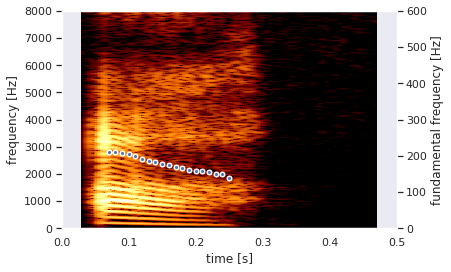

In [ ]:
# PLOT pitch - F0 calculation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound('natalia_va.wav')
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    print('FREQUENCY VALUES')
    print (pitch_values[pitch_values>1])
    print('F0 = ')
    print(np.mean(pitch_values[pitch_values>1]))
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x



In [ ]:
import struct
from scipy import signal as sg
import numpy as np

sampling_rate = 44100
freq = 196.1527661099652
samples = 44100
x = np.arange (samples)
y = 100 * np.sin(2 * np.pi * freq * x / sampling_rate)

f = open('test.wav', 'wb')

for i in y:
    f.write(struct.pack('b', int(i)))
f.close()

F0min  100 F0max  300
NUMBER OF POINTS 26
F1 list [1022.9859737392912, 1022.9859737392912, 1022.9859737392912, 1022.9859737392912, 1021.6511476180967, 1019.3038661841164, 1016.9457951856454, 1014.5538244128288, 1012.1280963211475, 1009.635744426252, 1007.1343110577317, 1004.6014926674669, 1002.0221066200071, 999.4089855256418, 996.7671345511635, 994.0886850176361, 991.368985443403, 988.6114320702897, 985.8140059458362, 982.9786240761096, 980.1008395959781, 977.1908266488713, 974.4539104437695, 974.4539104437695, 974.4539104437695, 974.4539104437695]


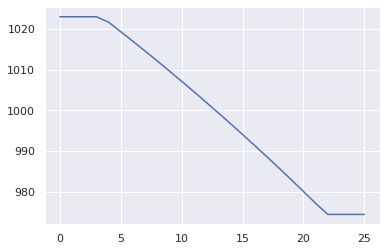

MEANS:  999.7717476961717 1454.775157450468 3286.579219044914 4051.5753481952534
MEDIANS:  1000.7155460728245 1453.9938397980811 3282.574159810421 4036.770275642125


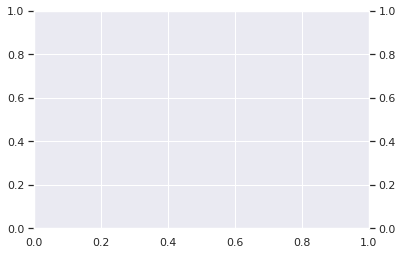

In [ ]:
# PLOT pitch - F1/F2 calculation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics

# This function measures formants using Formant Position formula
def measureFormants(f0min, f0max):
    snd = parselmouth.Sound('nataliaA1.wav') # read the sound
    pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    #https://www.fon.hum.uva.nl/praat/manual/Sound___Pitch__To_PointProcess__cc_.html

    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    #formants = call(snd, "To Formant (burg)", 0.0025, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    print('F0min ', f0min, 'F0max ', f0max)
    print('NUMBER OF POINTS', numPoints)

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    
    # Measure formants only at glottal pulses
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
        f3_list.append(f3)
        f4_list.append(f4)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    f3_list = [f3 for f3 in f3_list if str(f3) != 'nan']
    f4_list = [f4 for f4 in f4_list if str(f4) != 'nan']
    
    # calculate mean formants across pulses
    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)
    f3_mean = statistics.mean(f3_list)
    f4_mean = statistics.mean(f4_list)
    
    # calculate median formants across pulses, this is what is used in all subsequent calcualtions
    # you can use mean if you want, just edit the code in the boxes below to replace median with mean
    f1_median = statistics.median(f1_list)
    f2_median = statistics.median(f2_list)
    f3_median = statistics.median(f3_list)
    f4_median = statistics.median(f4_list)
    
    print('F1 list', f1_list)
    plt.plot(f1_list)

    plt.show()

    print('MEANS: ', f1_mean, f2_mean, f3_mean, f4_mean)
    print('MEDIANS: ', f1_median, f2_median, f3_median, f4_median)

plt.figure()
measureFormants(100, 300)
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x



<Figure size 432x288 with 0 Axes>

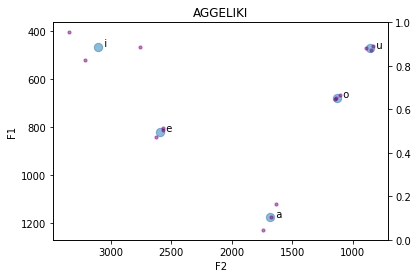

<Figure size 432x288 with 0 Axes>

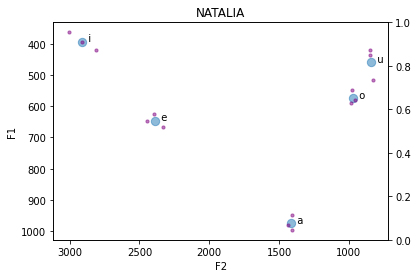

In [ ]:
# PLOT Vowels - F1/F2 results

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics

f1_agg_A = [1175, 1228, 1121]
f2_agg_A = [1676, 1738, 1630]
f1_agg_E = [840, 806, 811]
f2_agg_E = [2627, 2571, 2566]
f1_agg_I = [523, 468, 406]
f2_agg_I = [3212, 2757, 3347]
f1_agg_O = [681, 668, 685]
f2_agg_O = [1134, 1106, 1144]
f1_agg_U = [463, 478, 473]
f2_agg_U = [831, 844, 887]

f1_nat_A = [996, 949, 980]
f2_nat_A = [1408, 1408, 1436]
f1_nat_E = [647, 667, 624]
f2_nat_E = [2444, 2333, 2397]
f1_nat_I = [363, 421, 395]
f2_nat_I = [3008, 2811, 2913]
f1_nat_O = [589, 549, 580]
f2_nat_O = [982, 975, 956]
f1_nat_U = [437, 421, 516]
f2_nat_U = [849, 846, 828]

plt.figure()
y = [statistics.mean(f2_agg_A), statistics.mean(f2_agg_E), statistics.mean(f2_agg_I), statistics.mean(f2_agg_O), statistics.mean(f2_agg_U)]
x = [statistics.mean(f1_agg_A), statistics.mean(f1_agg_E), statistics.mean(f1_agg_I), statistics.mean(f1_agg_O), statistics.mean(f1_agg_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_agg_A, f1_agg_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_E, f1_agg_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_I, f1_agg_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_O, f1_agg_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_U, f1_agg_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))

plt.title("AGGELIKI")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x

plt.figure()
y = [statistics.mean(f2_nat_A), statistics.mean(f2_nat_E), statistics.mean(f2_nat_I), statistics.mean(f2_nat_O), statistics.mean(f2_nat_U)]
x = [statistics.mean(f1_nat_A), statistics.mean(f1_nat_E), statistics.mean(f1_nat_I), statistics.mean(f1_nat_O), statistics.mean(f1_nat_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_nat_A, f1_nat_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_E, f1_nat_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_I, f1_nat_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_O, f1_nat_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_U, f1_nat_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.plot(*zip(*shortest_route), '-o')
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
plt.title("NATALIA")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x


plt.figure()
y = [statistics.mean(f2_nat_A), statistics.mean(f2_nat_E), statistics.mean(f2_nat_I), statistics.mean(f2_nat_O), statistics.mean(f2_nat_U)]
x = [statistics.mean(f1_nat_A), statistics.mean(f1_nat_E), statistics.mean(f1_nat_I), statistics.mean(f1_nat_O), statistics.mean(f1_nat_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_nat_A, f1_nat_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_E, f1_nat_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_I, f1_nat_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_O, f1_nat_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_U, f1_nat_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.plot(*zip(*shortest_route), '-o')
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
plt.title("NATALIA")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x



F0min  100 F0max  2000
NUMBER OF POINTS 34
f2= 1476.9703180375548


<Figure size 432x288 with 0 Axes>

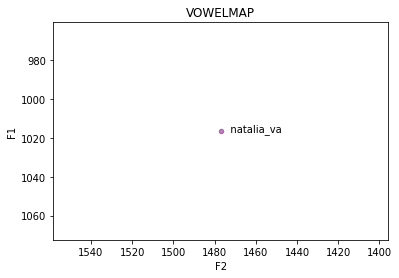

In [ ]:
# PLOT Vowels - F1/F2 results
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

path='/content/'

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
x=[]
y=[]
n=[]
for f in files:
    #print(Path(f).stem)
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, f)
    print('f2=',f2)
    #print(f1,f2)
    #x.append(f1)
    #y.append(f2)
    #print(type(x))
    x.append(f1)
    y.append(f2)
    plt.figure()
    n.append('   '+filename)
volume = 20
fig, ax = plt.subplots()
ax.scatter(f2, f1, s=volume, alpha=0.5, color='purple')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
    #volume2 = 10
    #ax.scatter(f2,f1, alpha=0.5, color="purple")
    #plt.gca().invert_xaxis()
    #plt.gca().invert_yaxis()

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p) # read the sound
    pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    #https://www.fon.hum.uva.nl/praat/manual/Sound___Pitch__To_PointProcess__cc_.html

    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    #formants = call(snd, "To Formant (burg)", 0.0025, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    print('F0min ', f0min, 'F0max ', f0max)
    print('NUMBER OF POINTS', numPoints)

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    
    # Measure formants only at glottal pulses
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    
    # calculate mean formants across pulses
    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_mean, f2_mean)

In [ ]:
# PLOT Vowels - F1/F2 results

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os

path=''

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
for f in files:
  print(path+f)

plt.figure()
y = [statistics.mean(f2_agg_A), statistics.mean(f2_agg_E), statistics.mean(f2_agg_I), statistics.mean(f2_agg_O), statistics.mean(f2_agg_U)]
x = [statistics.mean(f1_agg_A), statistics.mean(f1_agg_E), statistics.mean(f1_agg_I), statistics.mean(f1_agg_O), statistics.mean(f1_agg_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_agg_A, f1_agg_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_E, f1_agg_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_I, f1_agg_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_O, f1_agg_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_agg_U, f1_agg_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))

plt.title("AGGELIKI")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x

plt.figure()
y = [statistics.mean(f2_nat_A), statistics.mean(f2_nat_E), statistics.mean(f2_nat_I), statistics.mean(f2_nat_O), statistics.mean(f2_nat_U)]
x = [statistics.mean(f1_nat_A), statistics.mean(f1_nat_E), statistics.mean(f1_nat_I), statistics.mean(f1_nat_O), statistics.mean(f1_nat_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_nat_A, f1_nat_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_E, f1_nat_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_I, f1_nat_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_O, f1_nat_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_U, f1_nat_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.plot(*zip(*shortest_route), '-o')
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
plt.title("NATALIA")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x


plt.figure()
y = [statistics.mean(f2_nat_A), statistics.mean(f2_nat_E), statistics.mean(f2_nat_I), statistics.mean(f2_nat_O), statistics.mean(f2_nat_U)]
x = [statistics.mean(f1_nat_A), statistics.mean(f1_nat_E), statistics.mean(f1_nat_I), statistics.mean(f1_nat_O), statistics.mean(f1_nat_U)]
n = ['  a', '  e', '  i', '  o', '  u']

volume = 70
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5)
volume2 = 10
ax.scatter(f2_nat_A, f1_nat_A, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_E, f1_nat_E, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_I, f1_nat_I, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_O, f1_nat_O, s=volume2, alpha=0.5, color="purple")
ax.scatter(f2_nat_U, f1_nat_U, s=volume2, alpha=0.5, color="purple")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.plot(*zip(*shortest_route), '-o')
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
plt.title("NATALIA")
plt.xlabel("F2")
plt.ylabel("F1")
plt.twinx()
plt.show() # or plt.savefig("spectrogram_0.03.pdf")x



FRP

['Ι', 'Ε', 'Α', 'Ο', 'ΟΥ']


<function matplotlib.pyplot.show>

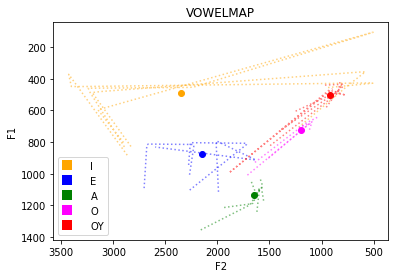

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

path='/content/'
#path=''

def measureFormants2(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    #pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)

    #formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    formants = call(snd, "To Formant (burg)", 0.1, 5, 6500, 0.025, 30)
    #numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    times = [0.2, 0.4, 0.6, 0.8, 1]
    for t in times:
      f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
      f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
      f1_list.append(f1)
      f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_list, f2_list) 

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    #pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    
    #number of points changes when f0min and f0max changes
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    #TO CHANGE ATTRIBUTES
    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_list, f2_list)  


#for i, txt in enumerate(n):
#    ax.annotate(txt, (y[i], x[i]))


files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

tl=['Ι', 'Ε', 'Α', 'Ο', 'ΟΥ']
i1=[]
e1=[]
a1=[]
o1=[]
u1=[]
i2=[]
e2=[]
a2=[]
o2=[]
u2=[]

for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, f)
    #print('FOR=', type(form))
    #print(len(f1))
    volume = 20
    #fig, ax = plt.subplots()
    #ax.scatter(f2, f1, s=volume, alpha=0.5, color='purple')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    if (any(elem in 'iIιΙ' for elem in filename)):
      i1.append(f1)
      i2.append(f2)
      plt.plot(f2,f1, color='orange', alpha=0.5, linestyle='dotted')
    if (any(elem in 'ΕεEe' for elem in filename)):
      e1.append(f1)
      e2.append(f2)
      plt.plot(f2,f1, color='blue', alpha=0.5, linestyle='dotted')
    if (any(elem in 'AaΑα' for elem in filename)):
      a1.append(f1)
      a2.append(f2)
      plt.plot(f2,f1, color='green', alpha=0.5, linestyle='dotted')
    if (any(elem in 'οΟoO' for elem in filename)):
      o1.append(f1)
      o2.append(f2)
      plt.plot(f2,f1, color='magenta', alpha=0.5, linestyle='dotted')
    if (any(elem in 'uUυΥ' for elem in filename)):
      u1.append(f1)
      u2.append(f2)
      plt.plot(f2,f1, color='red', alpha=0.5, linestyle='dotted')
print(tl)
i1 = [f1 for f1 in i1 if str(i1) != 'nan']
i2 = [f1 for f1 in i2 if str(i2) != 'nan']

i1=np.concatenate(i1)
i2=np.concatenate(i2)
e1=np.concatenate(e1)
e2=np.concatenate(e2)
a1=np.concatenate(a1)
a2=np.concatenate(a2)
o1=np.concatenate(o1)
o2=np.concatenate(o2)
u1=np.concatenate(u1)
u2=np.concatenate(u2)
#print(i1)
#i1_mean=statistics.mean(i1)
#print(i1_mean)

plt.plot(statistics.mean(i2), statistics.mean(i1), color='orange', marker='o')
plt.plot(statistics.mean(e2), statistics.mean(e1), color='blue', marker='o')
plt.plot(statistics.mean(a2), statistics.mean(a1), color='green', marker='o')
plt.plot(statistics.mean(o2), statistics.mean(o1), color='magenta', marker='o')
plt.plot(statistics.mean(u2), statistics.mean(u1), color='red', marker='o')
plt.legend(tl, loc='upper left')
leg = plt.legend(tl, loc='best')
for l in leg.legendHandles:            
    l.set_linewidth(10)
    l.set_alpha(1)
leg.legendHandles[0].set_color('orange')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('red')
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
plt.show
#n.append('   '+filename)
#print(type(x))

#for i, txt in enumerate(n):
    #ax.annotate(txt, (y[i], x[i]))

All in one

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

path='/content/'
#path=''

def measureFormants2(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    #pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)

    #formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    formants = call(snd, "To Formant (burg)", 0.1, 5, 6500, 0.025, 30)
    #numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    times = [0.2, 0.4, 0.6, 0.8, 1]
    for t in times:
      f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
      f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
      f1_list.append(f1)
      f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_list, f2_list) 

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    #pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    
    #number of points changes when f0min and f0max changes
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    #TO CHANGE ATTRIBUTES
    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_list, f2_list)  


#for i, txt in enumerate(n):
#    ax.annotate(txt, (y[i], x[i]))


files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

tl=['Ι', 'Ε', 'Α', 'Ο', 'ΟΥ']
i1=[]
e1=[]
a1=[]
o1=[]
u1=[]
i2=[]
e2=[]
a2=[]
o2=[]
u2=[]

for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, f)
    #print('FOR=', type(form))
    #print(len(f1))
    volume = 20
    #fig, ax = plt.subplots()
    #ax.scatter(f2, f1, s=volume, alpha=0.5, color='purple')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    if (any(elem in 'iIιΙ' for elem in filename)):
      i1.append(f1)
      i2.append(f2)
      if (any(elem in 'n' for elem in filename)):
          plt.plot(f2,f1, color='orange', alpha=0.5, linestyle='dotted')
      else
          plt.plot(f2,f1, color='orange', alpha=0.5, linestyle='dotted')
    if (any(elem in 'ΕεEe' for elem in filename)):
      e1.append(f1)
      e2.append(f2)
      plt.plot(f2,f1, color='blue', alpha=0.5, linestyle='dotted')
    if (any(elem in 'AaΑα' for elem in filename)):
      a1.append(f1)
      a2.append(f2)
      plt.plot(f2,f1, color='green', alpha=0.5, linestyle='dotted')
    if (any(elem in 'οΟoO' for elem in filename)):
      o1.append(f1)
      o2.append(f2)
      plt.plot(f2,f1, color='magenta', alpha=0.5, linestyle='dotted')
    if (any(elem in 'uUυΥ' for elem in filename)):
      u1.append(f1)
      u2.append(f2)
      plt.plot(f2,f1, color='red', alpha=0.5, linestyle='dotted')
print(tl)
i1 = [f1 for f1 in i1 if str(i1) != 'nan']
i2 = [f1 for f1 in i2 if str(i2) != 'nan']

i1=np.concatenate(i1)
i2=np.concatenate(i2)
e1=np.concatenate(e1)
e2=np.concatenate(e2)
a1=np.concatenate(a1)
a2=np.concatenate(a2)
o1=np.concatenate(o1)
o2=np.concatenate(o2)
u1=np.concatenate(u1)
u2=np.concatenate(u2)
#print(i1)
#i1_mean=statistics.mean(i1)
#print(i1_mean)

plt.plot(statistics.mean(i2), statistics.mean(i1), color='orange', marker='o')
plt.plot(statistics.mean(e2), statistics.mean(e1), color='blue', marker='o')
plt.plot(statistics.mean(a2), statistics.mean(a1), color='green', marker='o')
plt.plot(statistics.mean(o2), statistics.mean(o1), color='magenta', marker='o')
plt.plot(statistics.mean(u2), statistics.mean(u1), color='red', marker='o')
plt.legend(tl, loc='upper left')
leg = plt.legend(tl, loc='best')
for l in leg.legendHandles:            
    l.set_linewidth(10)
    l.set_alpha(1)
leg.legendHandles[0].set_color('orange')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('red')
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
plt.show
#n.append('   '+filename)
#print(type(x))

#for i, txt in enumerate(n):
    #ax.annotate(txt, (y[i], x[i]))

FINAL CODE

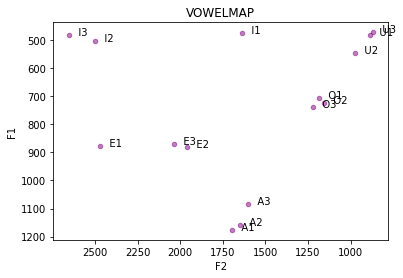

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

path='/content/'

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
x=[]
y=[]
n=[]
for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, f)
    x.append(f1)
    y.append(f2)
    n.append('   '+filename)
volume = 20
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5, color='purple')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)

    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_mean, f2_mean)

FINAL STANDALONE

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    pitch = call(snd, "To Pitch (cc)", 0, f0min, 15, 'no', 0.03, 0.45, 0.01, 0.35, 0.14, f0max)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)

    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")

    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []

    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2)
    
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']

    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)

    return (f1_mean, f2_mean)


path='vowels/'

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
x=[]
y=[]
n=[]
for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, path+f)
    x.append(f1)
    y.append(f2)
    n.append('   '+filename)
volume = 20
fig, ax = plt.subplots()
ax.scatter(y, x, s=volume, alpha=0.5, color='purple')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))
plt.savefig('v.png')



FRP FINAL CODE

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

path=''

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2) 
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)
    return (f1_list, f2_list)  

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
tl=['Ι', 'Ε', 'Α', 'Ο', 'ΟΥ']
i1=[]
e1=[]
a1=[]
o1=[]
u1=[]
i2=[]
e2=[]
a2=[]
o2=[]
u2=[]
for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, f)
    volume = 20
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    if (any(elem in 'iIιΙ' for elem in filename)):
      i1.append(f1)
      i2.append(f2)
      plt.plot(f2,f1, color='orange', alpha=0.5, linestyle='dotted')
    if (any(elem in 'ΕεEe' for elem in filename)):
      e1.append(f1)
      e2.append(f2)
      plt.plot(f2,f1, color='blue', alpha=0.5, linestyle='dotted')
    if (any(elem in 'AaΑα' for elem in filename)):
      a1.append(f1)
      a2.append(f2)
      plt.plot(f2,f1, color='green', alpha=0.5, linestyle='dotted')
    if (any(elem in 'οΟoO' for elem in filename)):
      o1.append(f1)
      o2.append(f2)
      plt.plot(f2,f1, color='magenta', alpha=0.5, linestyle='dotted')
    if (any(elem in 'uUυΥ' for elem in filename)):
      u1.append(f1)
      u2.append(f2)
      plt.plot(f2,f1, color='red', alpha=0.5, linestyle='dotted')
print(tl)
i1=np.concatenate(i1)
i2=np.concatenate(i2)
e1=np.concatenate(e1)
e2=np.concatenate(e2)
a1=np.concatenate(a1)
a2=np.concatenate(a2)
o1=np.concatenate(o1)
o2=np.concatenate(o2)
u1=np.concatenate(u1)
u2=np.concatenate(u2)
plt.plot(statistics.mean(i2), statistics.mean(i1), color='orange', marker='o')
plt.plot(statistics.mean(e2), statistics.mean(e1), color='blue', marker='o')
plt.plot(statistics.mean(a2), statistics.mean(a1), color='green', marker='o')
plt.plot(statistics.mean(o2), statistics.mean(o1), color='magenta', marker='o')
plt.plot(statistics.mean(u2), statistics.mean(u1), color='red', marker='o')
plt.legend(tl, loc='upper left')
leg = plt.legend(tl, loc='best')
for l in leg.legendHandles:            
    l.set_linewidth(10)
    l.set_alpha(1)
leg.legendHandles[0].set_color('orange')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('red')
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
plt.show

FRP STANDALONE

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
from scipy import signal as sg
from parselmouth.praat import call
import statistics
import os
from pathlib import Path

def measureFormants(f0min, f0max, p):
    snd = parselmouth.Sound(p)
    pointProcess = call(snd, "To PointProcess (periodic, cc)", f0min, f0max)
    formants = call(snd, "To Formant (burg)", 0.1, 5, 5500, 0.025, 30)
    numPoints = call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []
    f3_list = []
    f4_list = []
    for point in range(0, numPoints):
        point += 1
        t = call(pointProcess, "Get time from index", point)
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f1_list.append(f1)
        f2_list.append(f2) 
    f1_list = [f1 for f1 in f1_list if str(f1) != 'nan']
    f2_list = [f2 for f2 in f2_list if str(f2) != 'nan']
    f1_mean = statistics.mean(f1_list)
    f2_mean = statistics.mean(f2_list)
    return (f1_list, f2_list)  
path='vowels/'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
tl=['Ι', 'Ε', 'Α', 'Ο', 'ΟΥ']
i1=[]
e1=[]
a1=[]
o1=[]
u1=[]
i2=[]
e2=[]
a2=[]
o2=[]
u2=[]
for f in files:
    filename = Path(f).stem
    f1,f2=measureFormants(100, 2000, path+f)
    volume = 20
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    if (any(elem in 'iIιΙ' for elem in filename)):
      i1.append(f1)
      i2.append(f2)
      plt.plot(f2,f1, color='orange', alpha=0.5, linestyle='dotted')
    if (any(elem in 'ΕεEe' for elem in filename)):
      e1.append(f1)
      e2.append(f2)
      plt.plot(f2,f1, color='blue', alpha=0.5, linestyle='dotted')
    if (any(elem in 'AaΑα' for elem in filename)):
      a1.append(f1)
      a2.append(f2)
      plt.plot(f2,f1, color='green', alpha=0.5, linestyle='dotted')
    if (any(elem in 'οΟoO' for elem in filename)):
      o1.append(f1)
      o2.append(f2)
      plt.plot(f2,f1, color='magenta', alpha=0.5, linestyle='dotted')
    if (any(elem in 'uUυΥ' for elem in filename)):
      u1.append(f1)
      u2.append(f2)
      plt.plot(f2,f1, color='red', alpha=0.5, linestyle='dotted')
i1=np.concatenate(i1)
i2=np.concatenate(i2)
e1=np.concatenate(e1)
e2=np.concatenate(e2)
a1=np.concatenate(a1)
a2=np.concatenate(a2)
o1=np.concatenate(o1)
o2=np.concatenate(o2)
u1=np.concatenate(u1)
u2=np.concatenate(u2)
plt.plot(statistics.mean(i2), statistics.mean(i1), color='orange', marker='o')
plt.plot(statistics.mean(e2), statistics.mean(e1), color='blue', marker='o')
plt.plot(statistics.mean(a2), statistics.mean(a1), color='green', marker='o')
plt.plot(statistics.mean(o2), statistics.mean(o1), color='magenta', marker='o')
plt.plot(statistics.mean(u2), statistics.mean(u1), color='red', marker='o')
plt.legend(tl, loc='upper left')
leg = plt.legend(tl, loc='best')
for l in leg.legendHandles:            
    l.set_linewidth(10)
    l.set_alpha(1)
leg.legendHandles[0].set_color('orange')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('magenta')
leg.legendHandles[4].set_color('red')
plt.xlabel("F2")
plt.ylabel("F1")
plt.title("VOWELMAP")
plt.savefig('frp.png')